In [1]:
print("Hellow World")

Hellow World


In [2]:
#data is for block geographical stuff
#this code makes the function that makes the directories and retrieve the data
import os
import tarfile
import urllib
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd
#loads the data function and returns a panda frame
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(HOUSING_PATH,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
data=load_housing_data()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


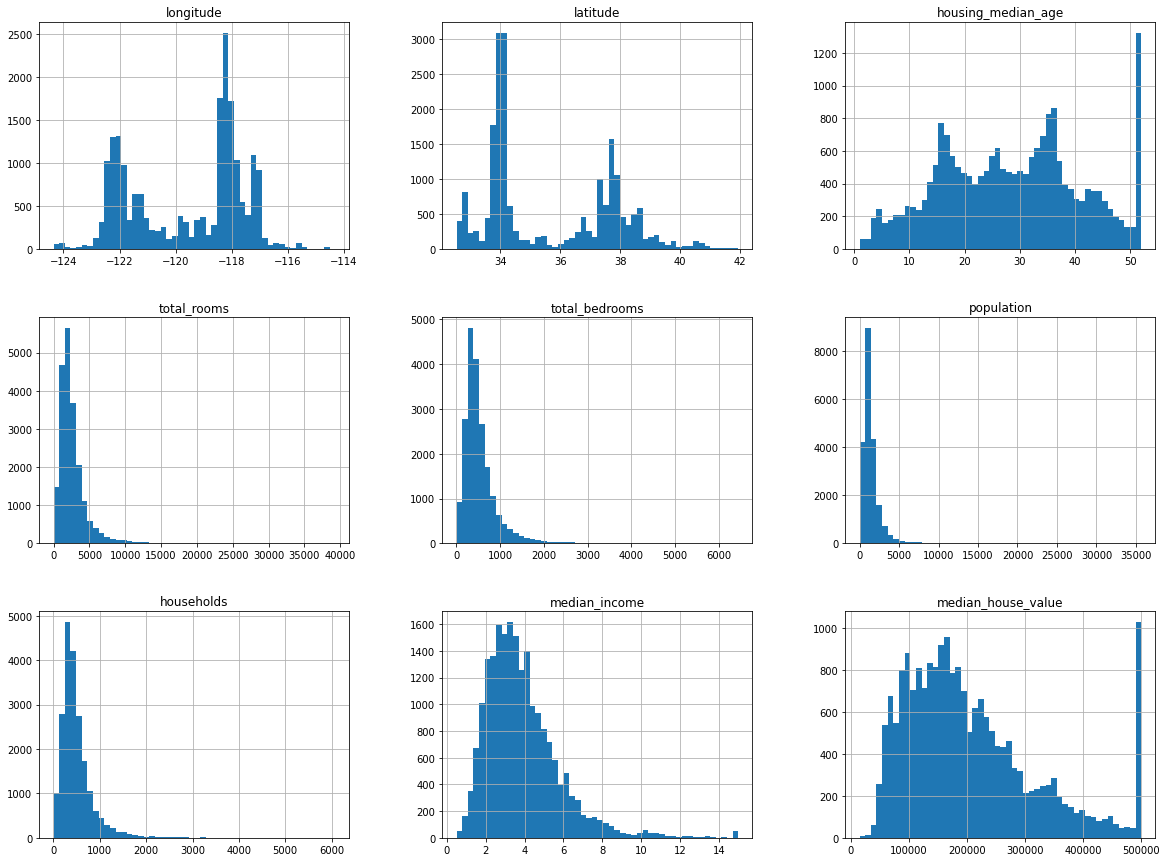

In [10]:
# %matplotlib inline # only in a Jupyter notebook import 

#showing historgrams of data
import matplotlib.pyplot as plt 
data.hist ( bins = 50 , figsize = ( 20 , 15 ))
plt.show ()

In [11]:
#creating a test-set to avoid data snooping bias

import numpy as np
def split_train_test(datam,test_ratio):
    shuffeled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffeled_indices[:test_set_size]
    train_indices=shuffeled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]#i think it return [train_indices]'s rows



In [12]:

trainset,testset=split_train_test(data,0.2)

In [13]:
print(testset.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16417    -121.27     37.88                43.0        968.0           249.0   
11847    -120.66     39.72                15.0       3763.0           784.0   
1099     -121.90     39.59                20.0       1465.0           278.0   
6845     -118.11     34.07                19.0       3215.0           907.0   
6951     -118.07     33.99                41.0       1204.0           252.0   

       population  households  median_income  median_house_value  \
16417       664.0       240.0         1.6458             83600.0   
11847       717.0       348.0         2.2019            130500.0   
1099        745.0       250.0         3.0625             93800.0   
6845       3072.0       870.0         2.3393            202300.0   
6951       1002.0       248.0         3.0577            163300.0   

      ocean_proximity  
16417          INLAND  
11847          INLAND  
1099           INLAND  
6845        <1H OCEA

In [14]:
data["median_income"].mean()

3.8706710029069766

In [15]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(data,test_size=0.2,random_state=2)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


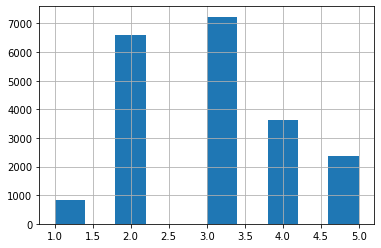

In [16]:
data["income_cat"]=pd.cut(data["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
data["income_cat"].hist()
data.head()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit



# print(thing)
# print("hi")
# for train_index,testindex

In [18]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
thing=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=2)
#adding "income_category" so i can make startified sampling using it then i wanna remove that column
for train_index, test_index in thing.split(data, data["income_cat"]):
    strat_train_set=data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [20]:
print(strat_test_set["income_cat"].value_counts()/len(strat_test_set))
print(data["income_cat"].value_counts()/len(data))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [21]:
#removing income_cat from new data
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [22]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,150700.0,NEAR OCEAN
16684,-120.59,35.11,25.0,3642.0,726.0,1729.0,673.0,3.1550,205400.0,<1H OCEAN
149,-122.22,37.80,52.0,2721.0,541.0,1185.0,515.0,4.5428,239800.0,NEAR BAY
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333,127900.0,INLAND
20032,-119.03,36.07,26.0,3210.0,646.0,1908.0,642.0,2.4167,77600.0,INLAND


In [23]:
exploration_set = strat_train_set . copy ()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

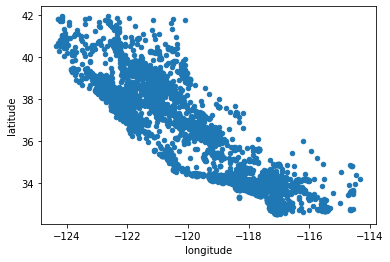

In [24]:
exploration_set.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

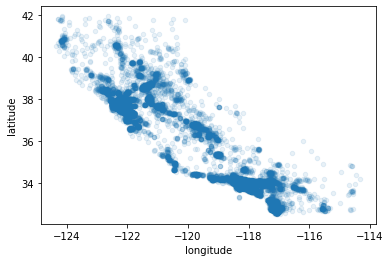

In [25]:
exploration_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)#this makes places with more points thicknes out while low desnsity ones go transparent

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

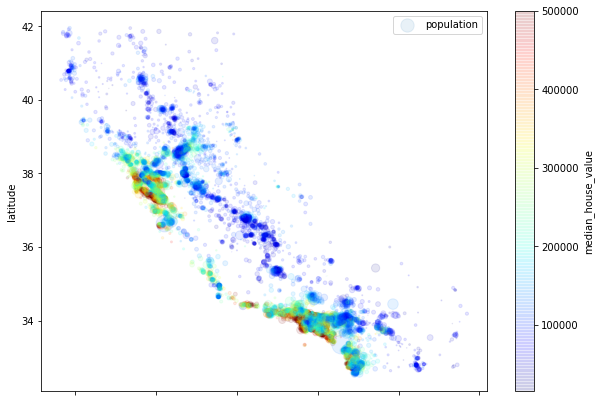

In [26]:
exploration_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=exploration_set["population"]/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

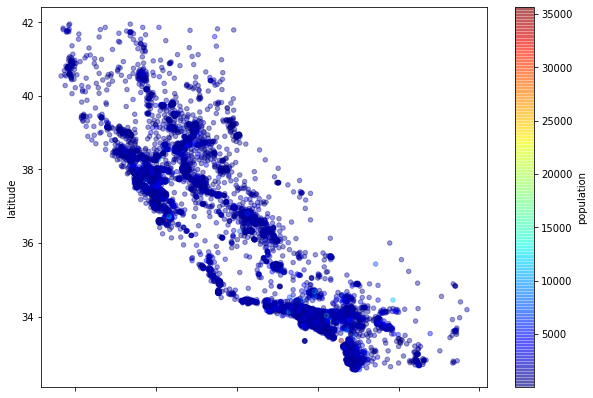

In [27]:
exploration_set.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,figsize=(10,7),c="population",cmap=plt.get_cmap("jet"),colorbar=True)

In [28]:
corr_matrix = exploration_set.corr ()
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.923854           -0.105354     0.045705   
latitude            -0.923854  1.000000            0.007658    -0.036783   
housing_median_age  -0.105354  0.007658            1.000000    -0.360059   
total_rooms          0.045705 -0.036783           -0.360059     1.000000   
total_bedrooms       0.071707 -0.068190           -0.318483     0.929895   
population           0.099497 -0.109629           -0.290974     0.854072   
households           0.055738 -0.071842           -0.300364     0.917369   
median_income       -0.016511 -0.079444           -0.127424     0.204011   
median_house_value  -0.045144 -0.145791            0.098210     0.140323   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071707    0.099497    0.055738      -0.016511   
latitude                 -0.068190   -0.109629   -0.071842      -0.079444   
housing_

In [29]:
corr_matrix [ "median_house_value" ] . sort_values ( ascending = False )

median_house_value    1.000000
median_income         0.686647
total_rooms           0.140323
housing_median_age    0.098210
households            0.072984
total_bedrooms        0.056057
population           -0.016927
longitude            -0.045144
latitude             -0.145791
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

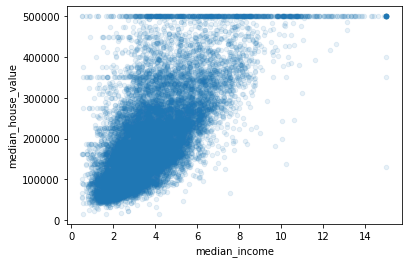

In [30]:
exploration_set . plot ( kind = "scatter" , x = "median_income" , y = "median_house_value" , alpha = 0.1 )

In [31]:
exploration_set["rooms_per_household"]=exploration_set["total_rooms"]/exploration_set["households"]
exploration_set["bedrooms_per_room"]=exploration_set["total_bedrooms"]/exploration_set["total_rooms"]
exploration_set["population_per_household"]=exploration_set["population"]/exploration_set["households"]

In [32]:
corr_matrix=exploration_set.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686647
rooms_per_household         0.145996
total_rooms                 0.140323
housing_median_age          0.098210
households                  0.072984
total_bedrooms              0.056057
population                 -0.016927
population_per_household   -0.019463
longitude                  -0.045144
latitude                   -0.145791
bedrooms_per_room          -0.252843
Name: median_house_value, dtype: float64

In [57]:
final_training_data=strat_train_set.drop("median_house_value",axis=1)
final_training_data_label=strat_train_set["median_house_value"].copy()
final_training_data.head()
print(final_training_data_label)

17428    150700.0
16684    205400.0
149      239800.0
11930    127900.0
20032     77600.0
           ...   
9770     109100.0
16978    270900.0
3199     107900.0
640      157400.0
620      171600.0
Name: median_house_value, Length: 16512, dtype: float64


In [34]:
# median = housing [ "total_bedrooms" ] . median () # option 3
# housing [ "total_bedrooms" ] . fillna ( median , inplace = True )

In [35]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [36]:
without_text_attributes=final_training_data.drop("ocean_proximity",axis=1)
imputer.fit(without_text_attributes)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2123.    ,  434.    , 1166.    ,
        408.5   ,    3.5377])

In [46]:
transformed_training=imputer.transform(without_text_attributes)
# print(transformed_training)
transformed_training=pd.DataFrame(transformed_training,columns=without_text_attributes.columns,index=without_text_attributes.index)
transformed_training.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875
16684,-120.59,35.11,25.0,3642.0,726.0,1729.0,673.0,3.1550
149,-122.22,37.80,52.0,2721.0,541.0,1185.0,515.0,4.5428
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333
20032,-119.03,36.07,26.0,3210.0,646.0,1908.0,642.0,2.4167


In [39]:
transformed_training.isnull().values.any()

False

In [40]:
#here we made cols of hot encoding only
from sklearn.preprocessing import OneHotEncoder
near_ocean_att=final_training_data[["ocean_proximity"]]
print(near_ocean_att)
category_encoder=OneHotEncoder()
data_with_encoded1hot_ocean=category_encoder.fit_transform(near_ocean_att)

      ocean_proximity
17428      NEAR OCEAN
16684       <1H OCEAN
149          NEAR BAY
11930          INLAND
20032          INLAND
...               ...
9770        <1H OCEAN
16978        NEAR BAY
3199           INLAND
640          NEAR BAY
620          NEAR BAY

[16512 rows x 1 columns]


In [41]:
category_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
from sklearn.base import BaseEstimator,TransformerMixin  
# rooms_ix , bedrooms_ix , population_ix , households_ix = 3 , 4 , 5 , 6
locs=["total_rooms","total_bedrooms","population","households"]

rooms_ix , bedrooms_ix , population_ix , households_ix=[final_training_data.columns.get_loc(loc) for loc in locs]
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder ( add_bedrooms_per_room = False )
housing_extra_attribs = attr_adder . transform ( final_training_data . values )

In [43]:
# col_names=[name for name in final_training_data.columns]
# print(col_names)
# col_names=col
housing_extra_attribs=pd.DataFrame(data=housing_extra_attribs,columns=list(final_training_data.columns)+["rooms_per_household","population_per_household"],index=final_training_data.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17428,-120.47,34.65,16.0,2549.0,428.0,1486.0,432.0,4.2875,NEAR OCEAN,5.900463,3.439815
16684,-120.59,35.11,25.0,3642.0,726.0,1729.0,673.0,3.155,<1H OCEAN,5.41159,2.569094
149,-122.22,37.8,52.0,2721.0,541.0,1185.0,515.0,4.5428,NEAR BAY,5.283495,2.300971
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333,INLAND,6.214433,3.77732
20032,-119.03,36.07,26.0,3210.0,646.0,1908.0,642.0,2.4167,INLAND,5.0,2.971963


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
num_pipeline = Pipeline ([ 
    ( 'imputer' , SimpleImputer ( strategy = "median" )), 
    ( 'attribs_adder' , CombinedAttributesAdder ()), 
    ( 'std_scaler' , StandardScaler ()), 
]) 
trainindata_piplined = num_pipeline . fit_transform ( transformed_training )

In [56]:
from sklearn.compose import ColumnTransformer
num_attribs=list(transformed_training)
# print(transformed_training)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
housing_prepared=full_pipeline.fit_transform(final_training_data)


In [60]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(housing_prepared,final_training_data_label)

LinearRegression()

In [64]:
some_data = final_training_data.iloc[:5]
some_labels=final_training_data_label.iloc[:5]
data_out=full_pipeline.transform(some_data)
print("PREDICTION IS :", lin.predict(data_out))
print("LABELS ARE", list(some_labels))

PREDICTION IS : [258100.81765463 236003.31514315 290621.17939204 176797.83827513
  90931.3261912 ]
LABELS ARE [150700.0, 205400.0, 239800.0, 127900.0, 77600.0]


In [65]:
from sklearn.metrics import mean_squared_error

housing_predictions=lin.predict(housing_prepared)
lin_mse=mean_squared_error(final_training_data_label,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68265.90542805477

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,final_training_data_label)
housing_predictions=tree_reg.predict(housing_prepared)
mse_tree=mean_squared_error(final_training_data_label,housing_predictions)
mse_tree

0.0

In [70]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,final_training_data_label,scoring="neg_mean_squared_error",cv=10)
tree_rmse_score=np.sqrt(-scores)

In [74]:
def printer(tree_rmse_score):
    print("Scores:", tree_rmse_score)
    print("mean:",tree_rmse_score.mean())
    print("STD DEV : ",tree_rmse_score.std())

In [77]:
lin_scores=cross_val_score(lin,housing_prepared,final_training_data_label,scoring="neg_mean_squared_error",cv=10)
final_lin_score=np.sqrt(-lin_scores)
printer(final_lin_score)


Scores: [63943.4603632  68131.1023668  66653.50861485 66412.49035692
 71651.43535297 69276.30004985 73787.69941603 66801.10364664
 71355.67746695 68542.3910222 ]
mean: 68655.516865642
STD DEV :  2792.139004328909


In [78]:
printer(tree_rmse_score)

Scores: [68754.94421165 73559.40700634 66349.23635058 71448.98611681
 74499.73787359 72059.52753344 74790.42870399 70658.26302634
 72142.23586557 69663.85637276]
mean: 71392.66230610698
STD DEV :  2506.4930514316243


In [84]:
def model_tryer_kvalidation(model):
    scores=cross_val_score(model,housing_prepared,final_training_data_label,scoring="neg_mean_squared_error",cv=10)
    pos_scores=np.sqrt(-scores)
    printer(pos_scores)

In [90]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared,final_training_data_label)
model_tryer_kvalidation(forest_reg)
house_predicitons=forest_reg.predict(housing_prepared)
rmse=mean_squared_error(final_training_data_label,house_predicitons)

print("RMSE IS :" , rmse)


Scores: [48299.30440331 50440.82900484 47616.6018124  49352.35220033
 53347.6489713  50167.27987485 54407.45050255 49417.50256504
 52171.92604908 50042.78064678]
mean: 50526.36760304759
STD DEV :  2052.677619938077
RMSE IS : 345972949.6274753


In [92]:
real_rmse=np.sqrt(rmse)
real_rmse

18600.348105008015

In [86]:
model_tryer_kvalidation(tree_reg)

Scores: [69617.31914266 74965.66159061 67787.52892361 71365.23527072
 75620.01092956 70205.07499532 75692.41445072 68539.96079101
 72211.2702784  69797.00801417]
mean: 71580.14843867833
STD DEV :  2787.24311389982
